Testing K: 100%|██████████| 48/48 [00:00<00:00, 136.37it/s]


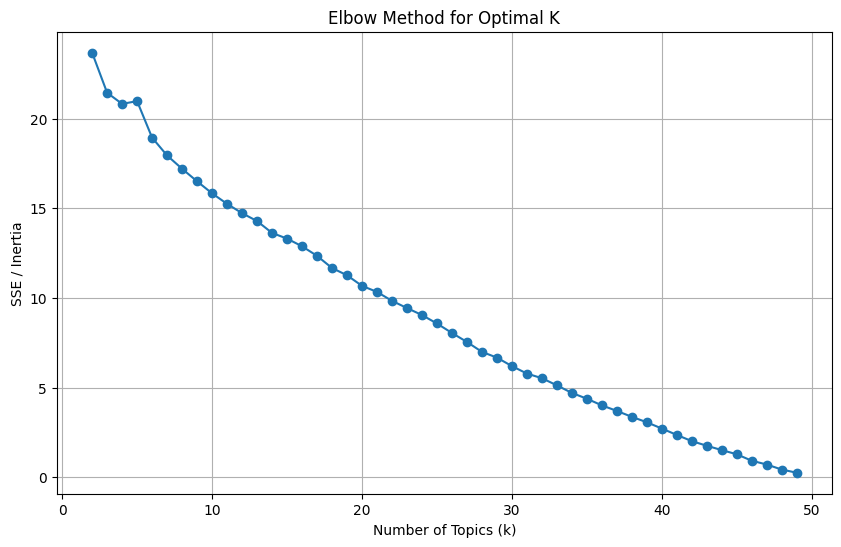

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm.auto import tqdm

# load embeddings
emb_labels = np.load("results_cluster/topic_emb_labels.npy")

sse = []             # inertia values
K_range = range(2, 50)   # 尝试 2~20 类，你可以调整

for k in tqdm(K_range, desc="Testing K"):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(emb_labels)
    sse.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,6))
plt.plot(K_range, sse, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Topics (k)")
plt.ylabel("SSE / Inertia")
plt.grid(True)
plt.savefig("results_cluster/elbow_curve.png", dpi=300, bbox_inches="tight")
plt.show()
